# This Notebook contains functions for univariate and bivariate analysis of the dataset.
### Chi sqare test
### One - way ANNOVA
### Two way ANNOVA
### F-Test
### Hypothesis testing
### Scatter plots, Factorplots, barplots for both categorical and Numerical features.
### Corelation matrix and heatmaps 

In [9]:
import re
import os
import datetime
import pandas as pd
import numpy as np
from scipy.stats import chisquare, f_oneway, f
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### This is just a sample data, However this will work on any data you feed it 

In [53]:
train = pd.read_csv(r'F:\Hackathons_Codes_and_Data\Analytics vidya\Loan_predictions\train_u6lujuX_CVtuZ9i.csv')
numeric = train._get_numeric_data()
char = train.select_dtypes(include = ['object'])
char = char.drop(['Loan_ID'], axis = 1)
target = train.Loan_Status
target = pd.DataFrame(target)
target.columns = ['Loan_Status']

# Univariate analysis of both numeical and categorical variables can be done using these functions

In [7]:
def univariate_num(df):
    print("The length of the dataset is  {}".format(len(df)))
    print("The missing values in the data are as follows")
    print(df.isnull().sum())
    print("The description of the data is a s follows")
    uni = df.describe()
    uni = uni.T
    print(uni)
    print("The various necessary plots of columns in data")
   
    
    if (len(df.columns) == 1):
        print("This is a KDE plot")
        sns.kdeplot(df, color ='r', shade =True)
        plt.show()
        print("This is a BOXPLOT")
        sns.boxplot(x = df)
        plt.show()

    else:
        for col in df.columns:
            #sns.distplot(df[col], bins =100, kde=True)
            print("This is a KDE plot")
            sns.kdeplot(df[col], color ='r', shade = True)
            plt.show()
            print("This is a BOXPLOT")
            sns.boxplot(x = df[col])
            plt.show()
    

In [3]:
def univariate_char(df):
    print("The number of training examples in the data are {}".format(len(df)))
    print("The description of the data is as follows")
    uni = df.describe()
    uni = uni.T
    print(uni)
    
    if (len(df.columns) == 1):
        print("Barplot for {}".format(df.columns))
        df.value_counts().plot(kind = 'bar')
                        
    for col in df.columns:
        print("The Barplots")
        sns.countplot(df[col])
        plt.show()

The number of training examples in the data are 614
The description of the data is as follows
              count unique        top freq
Loan_ID         614    614   LP001751    1
Gender          601      2       Male  489
Married         611      2        Yes  398
Dependents      599      4          0  345
Education       614      2   Graduate  480
Self_Employed   582      2         No  500
Property_Area   614      3  Semiurban  233
Loan_Status     614      2          Y  422
The Barplots


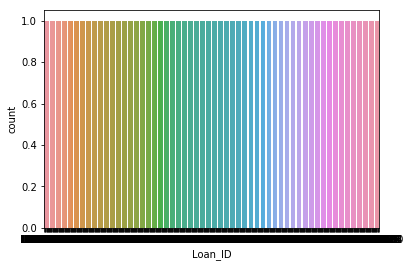

The Barplots


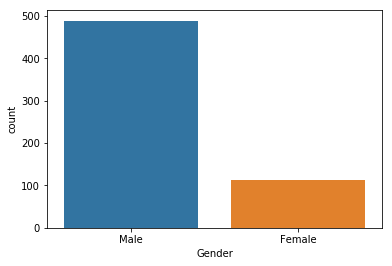

The Barplots


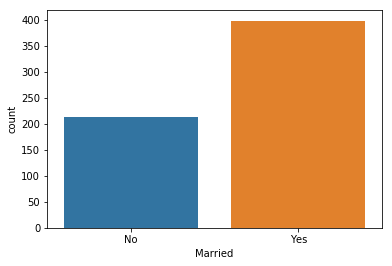

The Barplots


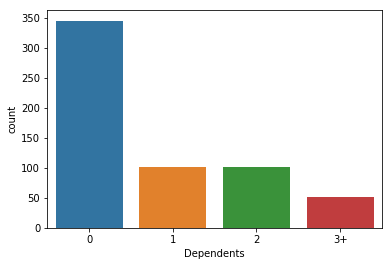

The Barplots


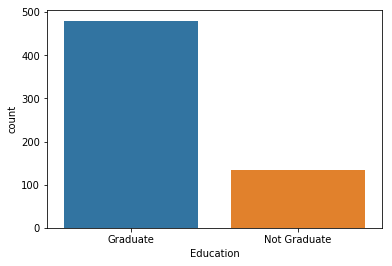

The Barplots


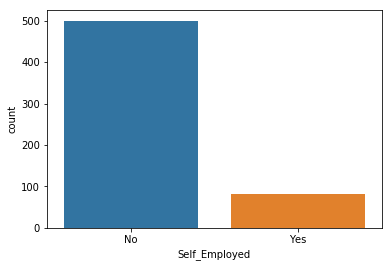

The Barplots


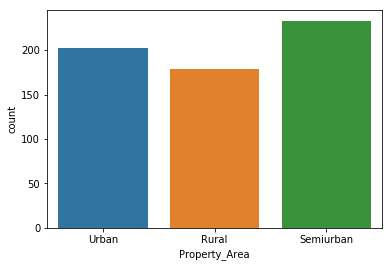

The Barplots


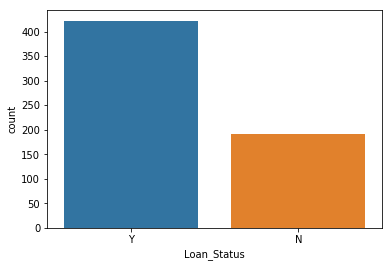

In [5]:
univariate_char(char)

The length of the dataset is  614
The missing values in the data are as follows
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64
The description of the data is a s follows
                   count         mean          std    min     25%     50%  \
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
CoapplicantIncome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
LoanAmount         592.0   146.412162    85.587325    9.0   100.0   128.0   
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   
Credit_History     564.0     0.842199     0.364878    0.0     1.0     1.0   

                       75%      max  
ApplicantIncome    5795.00  81000.0  
CoapplicantIncome  2297.25  41667.0  
LoanAmount          168.00    700.0  
Loan_Amount_Term    360.00    480.0  
Credit_History        1.00      1.0  
The various necessary plots of columns in data
This i

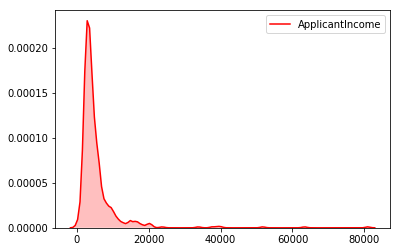

This is a BOXPLOT


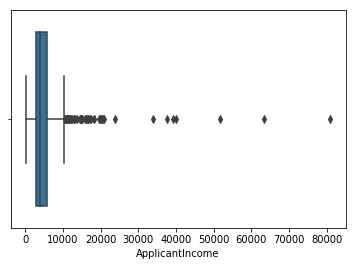

This is a KDE plot


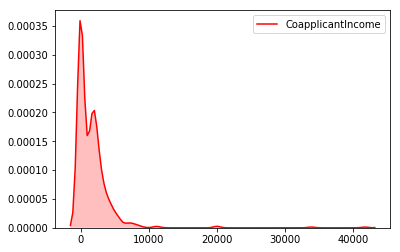

This is a BOXPLOT


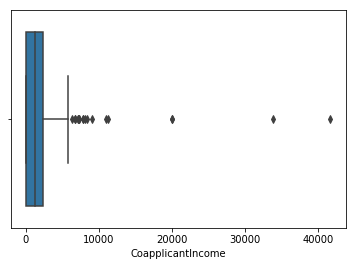

This is a KDE plot


C:\Users\nilu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\nilu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


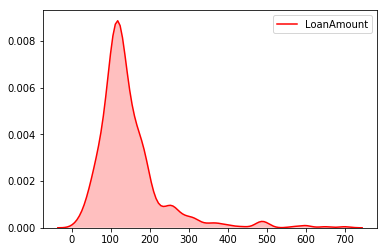

This is a BOXPLOT


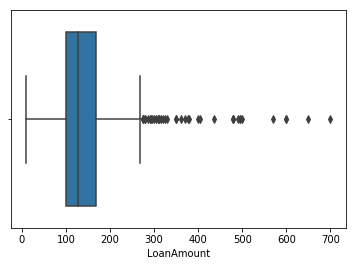

This is a KDE plot


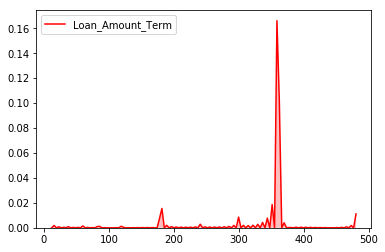

This is a BOXPLOT


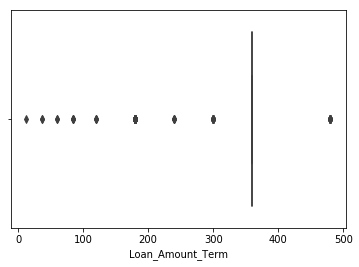

This is a KDE plot


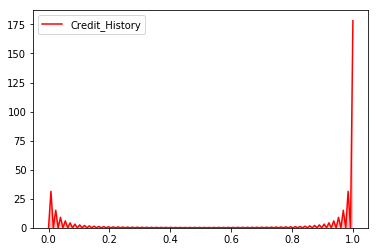

This is a BOXPLOT


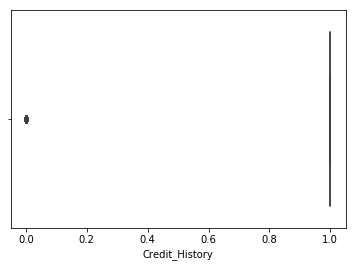

In [33]:
univariate_num(numeric)

In [34]:
def bivariate_num(df, target):
    print("The corelation matrix for the data is as follows")
    cor = df.corr()
    print(cor)
    
    tar = target.columns
    
    print("The heatmap for correlation matrix is as follows")
    sns.heatmap(cor)
    plt.show()
    
    Nn = []
    for i in cor:
        for j in cor:
            if (cor[i][j] > 0.4):
                if i!=j:
                    print("{} and {} are highly correalted hence only one out of the two should be kept in the data".format(i, j))
    
    for col in df:
        if (len(df) == 1):
            print("The scatter plot of {} and {} is what you are looking at".format(col, tar))
            plt.scatter(df[col], target[tar], c='b', markers ='o')
            plt.show()
        else:
            print("The scatter plot of {} and {} is what you are looking at".format(col, tar))
            plt.scatter(df[col], target[tar], c='b', marker ='o')
            plt.show()

The corelation matrix for the data is as follows
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  
The heatmap for correlation matrix is as follows


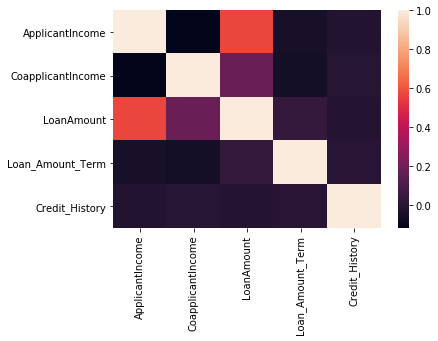

ApplicantIncome and LoanAmount are highly correalted hence only one out of the two should be kept in the data
LoanAmount and ApplicantIncome are highly correalted hence only one out of the two should be kept in the data
The scatter plot of ApplicantIncome and Index(['Loan_Status'], dtype='object') is what you are looking at


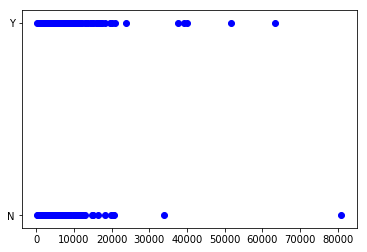

The scatter plot of CoapplicantIncome and Index(['Loan_Status'], dtype='object') is what you are looking at


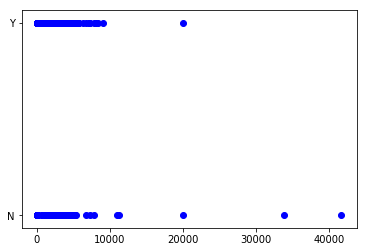

The scatter plot of LoanAmount and Index(['Loan_Status'], dtype='object') is what you are looking at


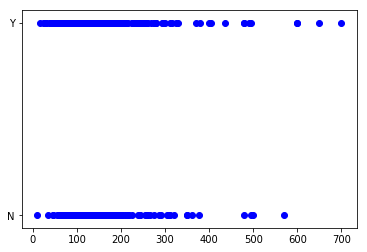

The scatter plot of Loan_Amount_Term and Index(['Loan_Status'], dtype='object') is what you are looking at


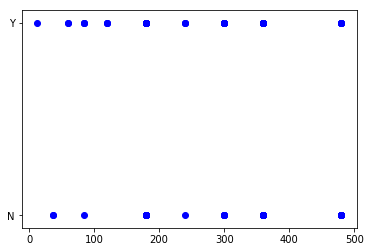

The scatter plot of Credit_History and Index(['Loan_Status'], dtype='object') is what you are looking at


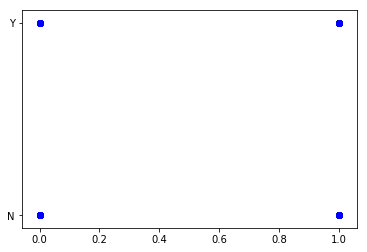

In [32]:
bivariate_num(numeric, target)

In [50]:
def bivariate_char(df, target):
    for col in df:
        tar = list(target.columns)
        c = tar[0]
        if (len(df) == 1):
            
            ss = pd.crosstab(df, target[c] )
            print("The table between a independent and dependent variable")
            print(ss)
            print("The barplot")
            ss.plot(kind = 'bar')
            plt.show()
        else:
            print("The table between a independent and dependent variable")
            ss = pd.crosstab(df[col], target[c] )
            print(ss)
            print("The barplot")
            ss.plot(kind = 'bar')
            plt.show()

The table between a independent and dependent variable
Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
The barplot


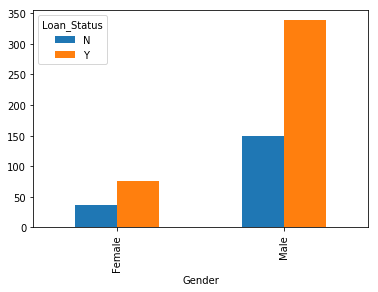

The table between a independent and dependent variable
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
The barplot


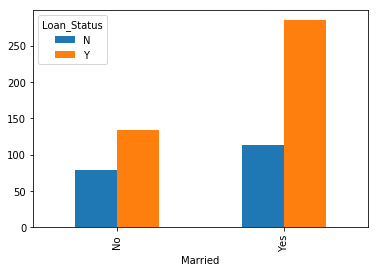

The table between a independent and dependent variable
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
The barplot


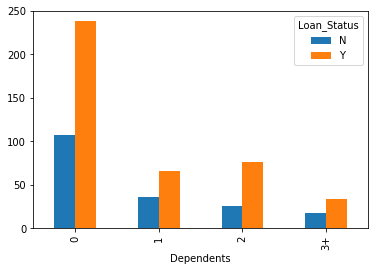

The table between a independent and dependent variable
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
The barplot


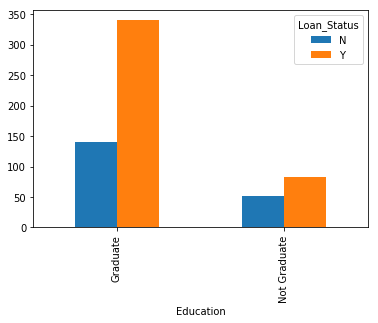

The table between a independent and dependent variable
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
The barplot


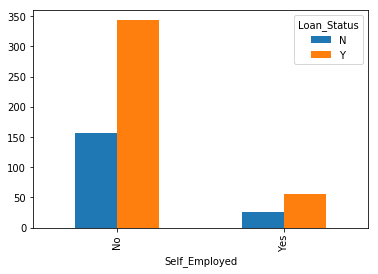

The table between a independent and dependent variable
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
The barplot


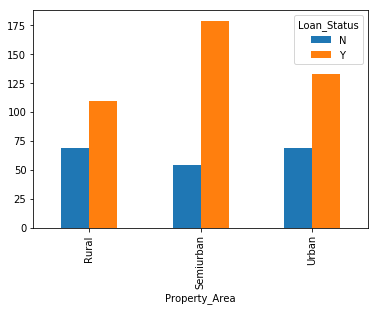

The table between a independent and dependent variable
Loan_Status    N    Y
Loan_Status          
N            192    0
Y              0  422
The barplot


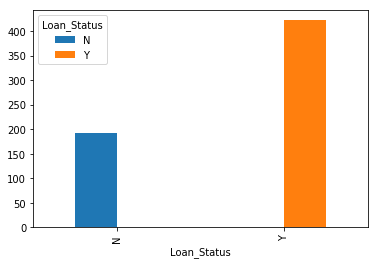

In [54]:
bivariate_char(char, target)